# What is minimize doing during linear regression? 

Here we will graphically investigate what ```minimize``` is doing in the context of linear regression. 

We will use the Ratemyprofessors dataset, but will restrict the illustrations to the 'Helpfulness' and 'Clarity' variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('https://matthew-brett.github.io/cfd2019/data/rate_my_course.csv') # reading in the data

df_reg = df[['Helpfulness', 'Clarity']].copy() # selecting the variables of interest

df_reg

,Helpfulness,Clarity
0,3.821866,3.756147
1,3.641526,3.487379
2,3.701530,3.608331
3,3.887536,3.909520
4,3.753642,3.788818
...,...,...
70,3.974701,3.932991
71,3.671364,3.636182
72,3.834545,3.749000
73,3.531154,3.441923


Let's say we are interested in the linear relationship between 'Helpfulness' and 'Clarity'. E.g. we want to predict Clarity ratings from Helpfulness ratings. 

Let's look at a scatter plot of the variables.

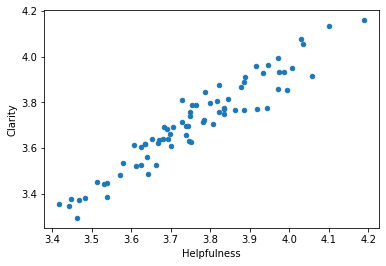

In [2]:
df_reg.plot.scatter('Helpfulness', 'Clarity');

It certainly looks like there is a straight line relationship between the two variables.

Using the method described in the 'Using minimize' page (https://matthew-brett.github.io/cfd2020/mean-slopes/using_minimize.html), we can find the line which minimizes the sum of the squared prediction errors.

In [3]:
def sos_error_for_minimize(c_s):
    # c_s has two elements, the intercept c and the slope s.
    c = c_s[0]
    s = c_s[1]
    predicted = c + df_reg['Helpfulness'] * s
    error = df_reg['Clarity'] - predicted
    return np.sum(error ** 2)

from scipy.optimize import minimize

min_res = minimize(sos_error_for_minimize, [2.25, 0.47])
display(min_res)

print('The intercept and slope of the best fitting line =', min_res.x)

      fun: 0.24216964323556794
 hess_inv: array([[ 3.2799683 , -0.87098391],
       [-0.87098391,  0.23175774]])
      jac: array([-3.72529030e-09, -2.98023224e-08])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([-0.36999503,  1.08536895])

The intercept and slope of the best fitting line = [-0.36999503  1.08536895]


Let's plot the predicted Clarity scores, using the intercept and slope values which the ```minimize``` function found.

You can see that the predicted data points all fall on a straight line. That line is the line of best fit for these two variables.

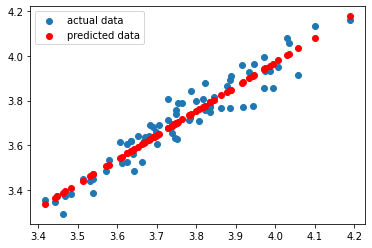

In [4]:
predicted = min_res.x[0] + min_res.x[1] * df_reg['Helpfulness'] # calculating the predicted scores
                                                                # prediction = intercept + slope * predictor

# plotting the actual data and the predicted data
plt.scatter(df_reg['Helpfulness'], df_reg['Clarity'], label = 'actual data')
plt.scatter(df_reg['Helpfulness'], predicted, color = 'red', label = 'predicted data')
plt.legend();

To get a clearer picture of what ```minimize``` is doing when it finds the best-fitting line, run the cell below.

The output of the cell will show you several things:

* how many attempts it took ```minimize``` to find the slope and intercept which give the smallest sum of the squared prediction errors (e.g. how many iterations before the best-fitting line was found)


* the value of the slope and intercept that ```minimize``` used on each iteration


* a graph showing the line that was fitted on that iteration. This graph shows:
    * the actual data points (shown in blue)
    * the predicted data points for the slope and intercept used on that iteration (shown in red) 
    * the prediction errors (shown in orange)
    
    
* The sum of the squared prediction errors on each interation

You can see that on each iteration ```minimize``` tries different slopes and intercepts (e.g. it fits different lines). It does this until it finds the slope and intercept values for the line which minimizes the sum of the squared prediction errors.


<i> Hint: </i> You may want to highlight the output of the cell and press 'SHIFT' and 'o' together, to turn off scrolling, so you can see what is happening better.


*******************************************************************************************************

The is attempt number: 0

The current intercept value =  1.0

The current slope value =  1.0


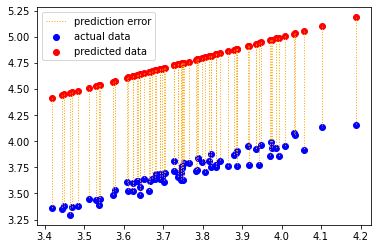

Sum of squared prediction error =  82.81383937857056

*******************************************************************************************************

The is attempt number: 1

The current intercept value =  1.0

The current slope value =  1.0


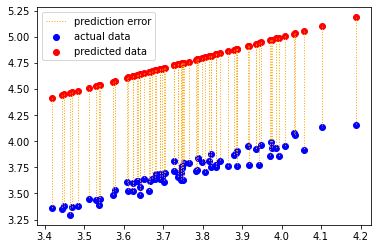

Sum of squared prediction error =  82.81383937857056

*******************************************************************************************************

The is attempt number: 2

The current intercept value =  1.0000000149011612

The current slope value =  1.0


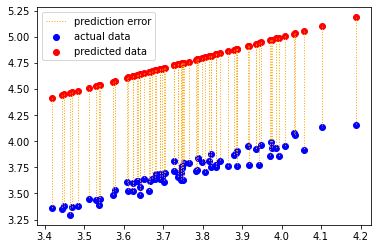

Sum of squared prediction error =  82.81384172363576

*******************************************************************************************************

The is attempt number: 3

The current intercept value =  1.0

The current slope value =  1.0000000149011612


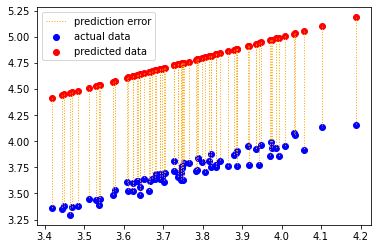

Sum of squared prediction error =  82.81384818622463

*******************************************************************************************************

The is attempt number: 4

The current intercept value =  0.7401375849384473

The current slope value =  0.02400229240106433


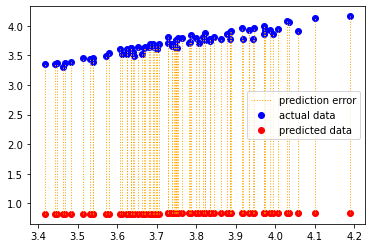

Sum of squared prediction error =  624.173284432467

*******************************************************************************************************

The is attempt number: 5

The current intercept value =  0.7401375849384473

The current slope value =  0.02400229240106433


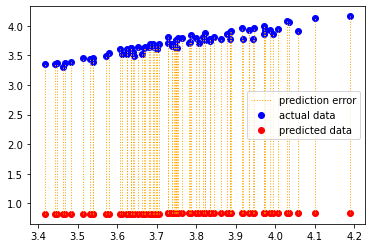

Sum of squared prediction error =  624.173284432467

*******************************************************************************************************

The is attempt number: 6

The current intercept value =  0.7401375998396085

The current slope value =  0.02400229240106433


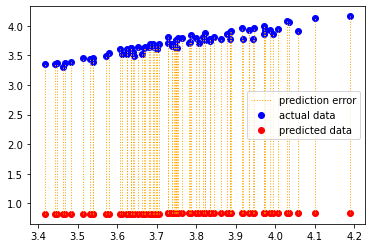

Sum of squared prediction error =  624.173277998163

*******************************************************************************************************

The is attempt number: 7

The current intercept value =  0.7401375849384473

The current slope value =  0.024002307302225523


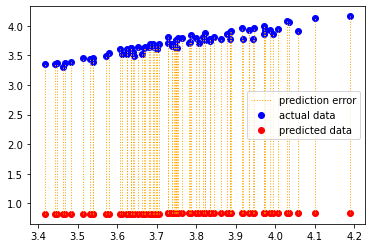

Sum of squared prediction error =  624.1732601830463

*******************************************************************************************************

The is attempt number: 8

The current intercept value =  0.9307512815994244

The current slope value =  0.7399139448576395


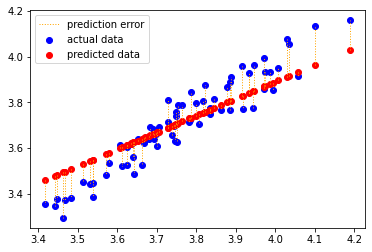

Sum of squared prediction error =  0.5000962630417345

*******************************************************************************************************

The is attempt number: 9

The current intercept value =  0.9307512815994244

The current slope value =  0.7399139448576395


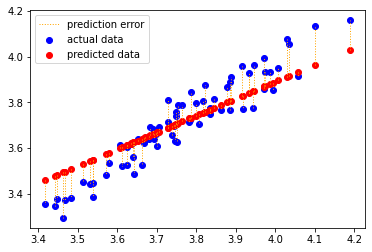

Sum of squared prediction error =  0.5000962630417345

*******************************************************************************************************

The is attempt number: 10

The current intercept value =  0.9307512965005856

The current slope value =  0.7399139448576395


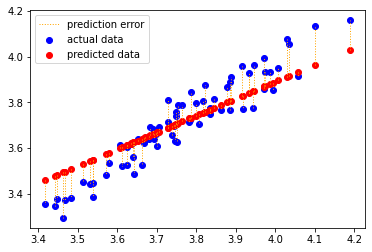

Sum of squared prediction error =  0.5000962685609784

*******************************************************************************************************

The is attempt number: 11

The current intercept value =  0.9307512815994244

The current slope value =  0.7399139597588007


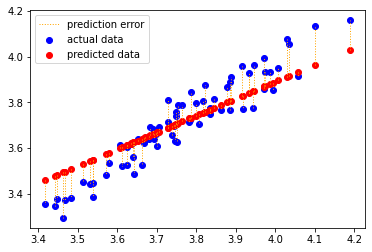

Sum of squared prediction error =  0.5000962615724942

*******************************************************************************************************

The is attempt number: 12

The current intercept value =  0.5603038779227155

The current slope value =  0.8382981565848294


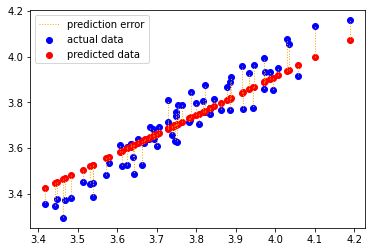

Sum of squared prediction error =  0.3741042338031002

*******************************************************************************************************

The is attempt number: 13

The current intercept value =  0.5603038779227155

The current slope value =  0.8382981565848294


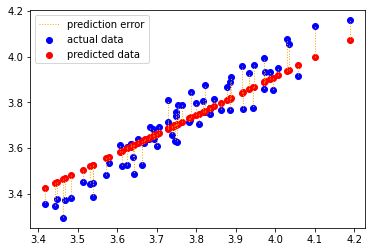

Sum of squared prediction error =  0.3741042338031002

*******************************************************************************************************

The is attempt number: 14

The current intercept value =  0.5603038928238767

The current slope value =  0.8382981565848294


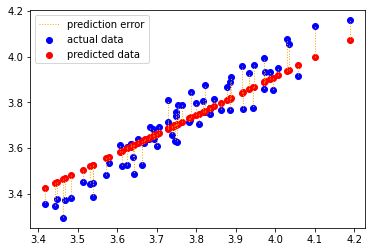

Sum of squared prediction error =  0.3741042377504367

*******************************************************************************************************

The is attempt number: 15

The current intercept value =  0.5603038779227155

The current slope value =  0.8382981714859906


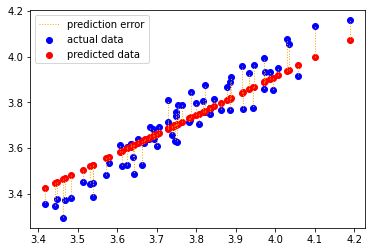

Sum of squared prediction error =  0.37410423275211047

*******************************************************************************************************

The is attempt number: 16

The current intercept value =  -0.3369962399395514

The current slope value =  1.076605055676386


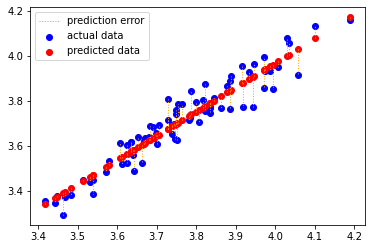

Sum of squared prediction error =  0.24233574200040336

*******************************************************************************************************

The is attempt number: 17

The current intercept value =  -0.3369962399395514

The current slope value =  1.076605055676386


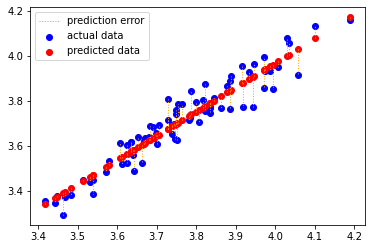

Sum of squared prediction error =  0.24233574200040336

*******************************************************************************************************

The is attempt number: 18

The current intercept value =  -0.3369962250383902

The current slope value =  1.076605055676386


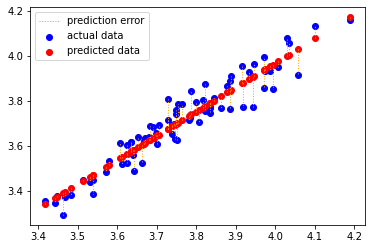

Sum of squared prediction error =  0.24233574214042028

*******************************************************************************************************

The is attempt number: 19

The current intercept value =  -0.3369962399395514

The current slope value =  1.0766050705775472


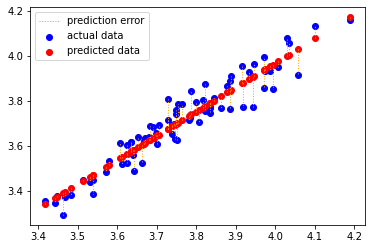

Sum of squared prediction error =  0.2423357419631241

*******************************************************************************************************

The is attempt number: 20

The current intercept value =  -0.3699950576379317

The current slope value =  1.0853689527774102


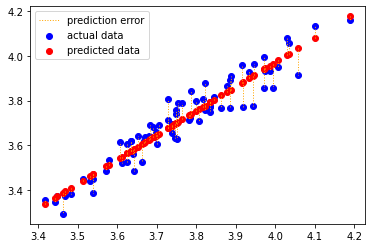

Sum of squared prediction error =  0.24216964323548384

*******************************************************************************************************

The is attempt number: 21

The current intercept value =  -0.3699950576379317

The current slope value =  1.0853689527774102


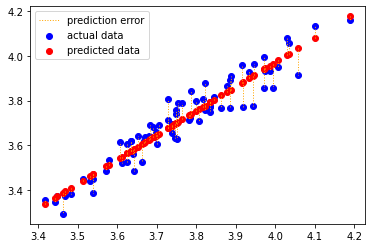

Sum of squared prediction error =  0.24216964323548384

*******************************************************************************************************

The is attempt number: 22

The current intercept value =  -0.36999504273677053

The current slope value =  1.0853689527774102


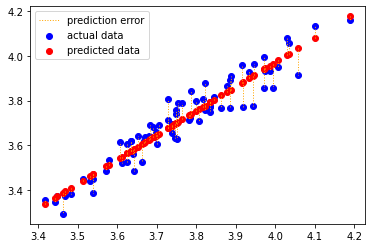

Sum of squared prediction error =  0.24216964323548384

*******************************************************************************************************

The is attempt number: 23

The current intercept value =  -0.3699950576379317

The current slope value =  1.0853689676785714


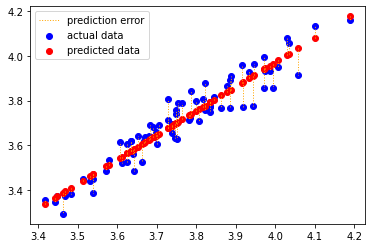

Sum of squared prediction error =  0.24216964323548443


      fun: 0.24216964323548384
 hess_inv: array([[ 3.27996844, -0.87098395],
       [-0.87098395,  0.23175775]])
      jac: array([0.00000000e+00, 3.91155481e-08])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([-0.36999506,  1.08536895])

The intercept and slope of the best fitting line = [-0.36999503  1.08536895]


In [6]:
# do not worry about this code, it just generates the illustration. What minimize is doing is exactly 
# the same as in the cell above.

count = pd.DataFrame({'count':0}, index = [0])

def sos_error_for_minimize(intercept_and_slope):
    
    print('\n*******************************************************************************************************')
   
    print('\nThe is attempt number:', count['count'].iloc[0])
    intercept = intercept_and_slope[0]
    
    print('\nThe current intercept value = ', intercept)
    
    slope = intercept_and_slope[1]
    
    print('\nThe current slope value = ', slope)
    
    predicted = intercept + df_reg['Helpfulness'] * slope
    
    error = df_reg['Clarity'] - predicted
    
    plt.scatter(df_reg['Helpfulness'], df_reg['Clarity'], color = 'blue', label = 'actual data')
    
    plt.scatter(df_reg['Helpfulness'], predicted, color = 'red', label = 'predicted data')
    
    
    for i in np.arange(len(df_reg['Helpfulness'])):
        x = df_reg['Helpfulness'][i]
        y_0 = predicted[i]
        y_1 = df_reg['Clarity'][i]
        plt.plot([x, x], [y_0, y_1], ':', color='orange', linewidth=1)
    
    plt.plot([x, x], [y_0, y_1], ':', color='orange', linewidth=1, label = 'prediction error')
    plt.legend()
    plt.show()
    
    print('Sum of squared prediction error = ', np.sum(error ** 2))
    
    count['count'].iloc[0] = count['count'].iloc[0] + 1
    
    return np.sum(error ** 2)

display(minimize(sos_error_for_minimize, [1, 1]))
print('The intercept and slope of the best fitting line =', min_res.x)